In [170]:
import pandas as pd
import yfinance as yf
import time
import numpy as np

In [171]:
from datetime import date
today = date.today()

df = yf.download(
tickers = ["ETH-USD"],
start = "2016-01-01",
end = today
)

[*********************100%***********************]  1 of 1 completed


In [172]:
df.to_csv('data.csv')
gstock_data = pd.read_csv('data.csv')
set = gstock_data.iloc[:, 1:2].values
set

array([[ 308.64498901],
       [ 320.67098999],
       [ 298.58599854],
       ...,
       [1577.10742188],
       [1567.69897461],
       [1515.24963379]])

In [173]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
set = Ms.fit_transform(set)
set.shape[0]

1898

In [174]:
train_len = int(len(set)*0.95)
train_len

1803

In [175]:
x_train = set[0:train_len]
y_train = set[1:train_len+1]

x_test = set[train_len:set.shape[0]-1]
y_test = set[train_len+1:set.shape[0]]

In [176]:
x_train = np.reshape(x_train,(x_train.shape[0],1,1))

In [177]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(None,1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=6))
model.compile(optimizer='adam',loss='mean_squared_error')

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_42 (LSTM)              (None, None, 50)          10400     
                                                                 
 dropout_41 (Dropout)        (None, None, 50)          0         
                                                                 
 lstm_43 (LSTM)              (None, None, 50)          20200     
                                                                 
 dropout_42 (Dropout)        (None, None, 50)          0         
                                                                 
 lstm_44 (LSTM)              (None, None, 50)          20200     
                                                                 
 dropout_43 (Dropout)        (None, None, 50)          0         
                                                                 
 lstm_45 (LSTM)              (None, 50)              

In [178]:
model.fit(x_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
57/57 [==============================] - 5s 4ms/step - loss: 0.0809
Epoch 2/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0237
Epoch 3/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0045
Epoch 4/100
57/57 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 5/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 6/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 7/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 8/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 9/100
57/57 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 10/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 11/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 12/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 13/100
57/57 [=================

In [179]:
predict_price = model.predict(x_test)
predict_price = Ms.inverse_transform(predict_price)
y_test = Ms.inverse_transform(y_test)

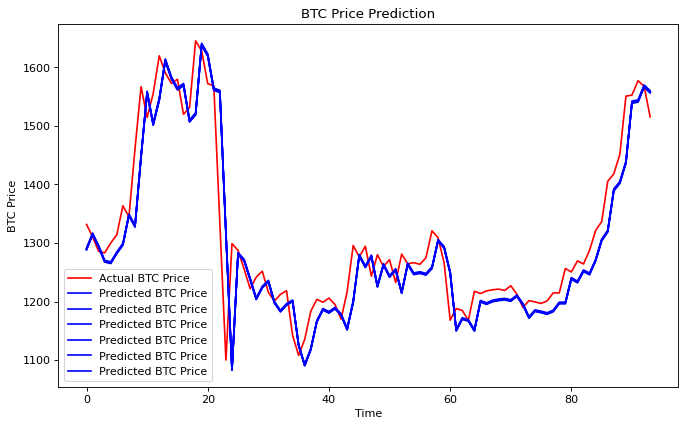

In [180]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6),dpi=80)
plt.plot(y_test, color = 'red', label = 'Actual BTC Price')
plt.plot(predict_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction')
plt.xlabel('Time')
plt.ylabel('BTC Price')
plt.legend()
plt.show()